In [47]:
#importing packages
import pandas as pd
import numpy as np
import re
import string
import contractions
import unicodedata
import nltk
import spacy
import sklearn
import matplotlib.pyplot as plt
import en_core_web_sm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
#loading the test and train data
df=pd.read_csv(r"C:\Users\user 1\Downloads\train.csv")
test=pd.read_csv(r"C:\Users\user 1\Downloads\test.csv")

In [4]:
df.head()

,ID,Silver,Status,Trusted Reviews,Last Reviewed On,Violation,Place,Review,Sentiment,Sentiment_Target
0,679455653,False,finalized,3,21-02-2015 00:36,1.0\r0.6667\r0.6667,Jaipur,"I'm not a huge Tea Post lover, but I've been t...",0.011398,Negative
1,679455654,False,finalized,3,21-02-2015 00:27,1,Jaipur,Terrible customer service. ÃŽÂ¾I came in at 9:...,0.012321,Negative
2,679455655,False,finalized,3,21-02-2015 00:26,1.0\r1.0,Jaipur,"First they ""lost"" my order, actually they gave...",0.571920,Neutral
3,679455656,False,finalized,3,21-02-2015 00:27,0.6667,Jaipur,I see I'm not the only one giving 1 star. Only...,0.256876,Negative
4,679455657,False,finalized,3,21-02-2015 00:27,1,Jaipur,"Well, it's Tea Post's, so you know what the fo...",0.082520,Negative


In [5]:
#getting the values of null value rows sum for training data
df.isnull().sum()

ID                   0
Silver               0
Status               0
Trusted Reviews      0
Last Reviewed On     0
Violation           39
Place                0
Review               0
Sentiment            0
Sentiment_Target     0
dtype: int64

In [6]:
#getting the values of null value rows sum for test data
test.isnull().sum()

ID                   0
Silver               0
Status               0
Trusted Reviews      0
Last Reviewed On     0
Violation           15
Place               87
Review               0
Sentiment            0
Target_Class         0
dtype: int64

In [7]:
len(df)

1010

In [8]:
df.shape

(1010, 10)

In [9]:
len(test)

515

In [10]:
test.shape

(515, 10)

In [11]:
#removing the null value rows from the training data
df.dropna(inplace=True)

In [12]:
len(df)

971

In [13]:
#removing the null value rows from the testing data
test.dropna(inplace=True)

In [14]:
len(test)

414

In [15]:
test.shape

(414, 10)

In [16]:
#getting all the classes from the target in train data
df['Sentiment_Target'].value_counts()

Negative    612
Positive    187
Neutral     172
Name: Sentiment_Target, dtype: int64

In [17]:
#getting all the classes from the target in test data
test['Target_Class'].value_counts()

Negative    258
Positive     96
Neutral      60
Name: Target_Class, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 1009
Data columns (total 10 columns):
ID                  971 non-null int64
Silver              971 non-null bool
Status              971 non-null object
Trusted Reviews     971 non-null int64
Last Reviewed On    971 non-null object
Violation           971 non-null object
Place               971 non-null object
Review              971 non-null object
Sentiment           971 non-null float64
Sentiment_Target    971 non-null object
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 76.8+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 514
Data columns (total 10 columns):
ID                  414 non-null int64
Silver              414 non-null bool
Status              414 non-null object
Trusted Reviews     414 non-null int64
Last Reviewed On    414 non-null object
Violation           414 non-null object
Place               414 non-null object
Review              414 non-null object
Sentiment           414 non-null float64
Target_Class        414 non-null object
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 32.7+ KB


In [20]:
#dropping the unwanted columns from the training data
df.drop(columns=['Silver','Status','Violation','Last Reviewed On','Place'],inplace=True)

In [21]:
#dropping the unwanted columns from the testing data
test.drop(columns=['Silver','Status','Violation','Last Reviewed On','Place'],inplace=True)

In [22]:
test.head()

,ID,Trusted Reviews,Review,Sentiment,Target_Class
0,679456683,3,I have not had the same bad luck as other Yelp...,0.877415,Positive
1,679456684,3,Check your order before you drive off. Always ...,0.133207,Negative
2,679456685,3,"After reading the other reviews, I realized my...",0.539689,Neutral
3,679456686,3,"I don't like this place at all, It is always d...",0.027984,Negative
4,679456687,3,I love Tea PostI had 5 ice cream cones once. N...,0.863003,Positive


In [23]:
df.head()

,ID,Trusted Reviews,Review,Sentiment,Sentiment_Target
0,679455653,3,"I'm not a huge Tea Post lover, but I've been t...",0.011398,Negative
1,679455654,3,Terrible customer service. ÃŽÂ¾I came in at 9:...,0.012321,Negative
2,679455655,3,"First they ""lost"" my order, actually they gave...",0.571920,Neutral
3,679455656,3,I see I'm not the only one giving 1 star. Only...,0.256876,Negative
4,679455657,3,"Well, it's Tea Post's, so you know what the fo...",0.082520,Negative


In [24]:
#removing the specialcharacters,converting into lowercase,applying contractions,removing stopwords
from nltk.stem.porter import*
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import nltk.stem 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
#l=WordNetLemmatizer()
p_stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))




def clean(t):
    t=t.lower()
    t=re.sub('\[.*?\]','',t)
    t=contractions.fix(t,0)
    t=re.sub('[%s]' % re.escape(string.punctuation),'',t)
    t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    t=re.sub('\w*\d\w*','',t)
    t=word_tokenize(t)
    stop_words=set(stopwords.words("english"))
    t=[word for word in t if word not in stop_words]
    #t=[l.lemmatize(word) for word in t]
    #spacy.load("en_core_web_sm")
    #import en_core_web_sm
    #nlp = en_core_web_sm.load()
    #nlp=spacy.load('en')
    #nlp = spacy.load('en_core_web_sm', disable = ['parser','ner','tagger'])
    #d=spacy.tokens.Doc(nlp.vocab,words=t
    #t=[nlp(word) for word in t ]
    t=[p_stemmer.stem(word) for word in t]
               
    return t
cl=lambda x:clean(x)


[nltk_data] Downloading package stopwords to C:\Users\user
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\user
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\user
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
#applying the function for training data
df['CleanReview']=pd.DataFrame(df.Review.apply(clean))


In [26]:
#applying the function for testing data
test['CleanReview']=pd.DataFrame(test.Review.apply(clean))

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user 1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
#function to get the nouns
def nouns(t):
    is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
    #tokenized = nltk.word_tokenize(lines)
    noun = [word for (word, pos) in nltk.pos_tag(t) if is_noun(pos)] 
    

    return noun



In [29]:
#extracting the nouns from training data
df['TopNouns']=pd.DataFrame(df.CleanReview.apply(nouns))

In [30]:
#extracting the nouns from testing data
test['TopNouns']=pd.DataFrame(test.CleanReview.apply(nouns))

In [31]:
df.head()

,ID,Trusted Reviews,Review,Sentiment,Sentiment_Target,CleanReview,TopNouns
0,679455653,3,"I'm not a huge Tea Post lover, but I've been t...",0.011398,Negative,"[I, huge, tea, post, lover, I, better, one, fa...","[tea, post, lover, complet, order, everi, time..."
1,679455654,3,Terrible customer service. ÃŽÂ¾I came in at 9:...,0.012321,Negative,"[terribl, custom, servic, came, stood, front, ...","[terribl, custom, servic, regist, bother, anyt..."
2,679455655,3,"First they ""lost"" my order, actually they gave...",0.571920,Neutral,"[first, lost, order, actual, gave, someon, one...","[order, someon, els, minut, figur, ask, ticket..."
3,679455656,3,I see I'm not the only one giving 1 star. Only...,0.256876,Negative,"[see, I, one, give, star, star, need, say]","[star, star]"
4,679455657,3,"Well, it's Tea Post's, so you know what the fo...",0.082520,Negative,"[well, tea, post, know, food, review, reflect,...","[post, food, review, locat, countless, time, y..."


In [32]:
test.head()

,ID,Trusted Reviews,Review,Sentiment,Target_Class,CleanReview,TopNouns
0,679456683,3,I have not had the same bad luck as other Yelp...,0.877415,Positive,"[bad, luck, yelper, drive, thru, quick, peopl,...","[luck, drive, thru, peopl, kid, work, window, ..."
1,679456684,3,Check your order before you drive off. Always ...,0.133207,Negative,"[check, order, drive, alway, miss, someth, mes...","[check, order, drive, alway, someth, mess, ord..."
2,679456685,3,"After reading the other reviews, I realized my...",0.539689,Neutral,"[read, review, realiz, case, isol, fri, warm, ...","[review, case, isol, fri, warm, tabl, floor, d..."
3,679456686,3,"I don't like this place at all, It is always d...",0.027984,Negative,"[like, place, alway, dirti, check, order, driv...","[place, order, drive, throughthey, textbook, r..."
4,679456687,3,I love Tea PostI had 5 ice cream cones once. N...,0.863003,Positive,"[love, tea, posti, ice, cream, cone, regret]","[tea, posti, ice, cream, cone, regret]"


In [33]:
#function to get the frequency count of the nouns
freqdict = {}
def calculate_mostFrequent(s):
    for word in s:
        if word in freqdict:
            freqdict[word] = freqdict[word] + 1
        else:
            freqdict[word] = 1

for col in df['TopNouns']:
    calculate_mostFrequent(col)

print(freqdict)

{'tea': 826, 'post': 877, 'lover': 2, 'complet': 35, 'order': 845, 'everi': 50, 'time': 459, 'staff': 130, 'terribl': 42, 'nobodi': 4, 'care': 46, 'custom': 175, 'servic': 159, 'regist': 32, 'bother': 10, 'anyth': 24, 'help': 23, 'els': 44, 'food': 564, 'insid': 64, 'outsid': 24, 'window': 137, 'door': 42, 'greet': 15, 'way': 132, 'floor': 35, 'cover': 6, 'drop': 18, 'fill': 24, 'worker': 45, 'someon': 53, 'minut': 134, 'figur': 9, 'ask': 124, 'ticket': 6, 'asst': 1, 'mgr': 7, 'look': 114, 'incomplet': 7, 'check': 43, 'correctlysh': 1, 'act': 17, 'begrudgingli': 1, 'fact': 32, 'someth': 44, 'ticketso': 1, 'breakfast': 120, 'biscuit': 26, 'plattera': 1, 'woman': 19, 'approach': 7, 'identifi': 2, 'manag': 159, 'dress': 8, 'tshirt': 1, 'sweat': 1, 'pantssh': 1, 'heard': 3, 'happen': 6, 'itwel': 1, 'annoy': 15, 'incompet': 12, 'star': 85, 'review': 80, 'locat': 237, 'countless': 2, 'year': 59, 'fail': 3, 'end': 32, 'thing': 108, 'taker': 7, 'rude': 45, 'smile': 18, 'lot': 79, 'lip': 1, 'sm

In [34]:
sorted_dict = sorted(freqdict.items(), key=lambda x: x[1], reverse=True)
#print(sorted_dict)

top_fifteen_dict = {}
count=1
for i,j in sorted_dict:
    if count > 15:
        break
    
    top_fifteen_dict[i] = j
    count=count+1

print(top_fifteen_dict)

{'post': 877, 'order': 845, 'tea': 826, 'food': 564, 'time': 459, 'place': 320, 'locat': 237, 'drive': 234, 'thru': 193, 'tp': 183, 'work': 179, 'wait': 178, 'custom': 175, 'servic': 159, 'manag': 159}


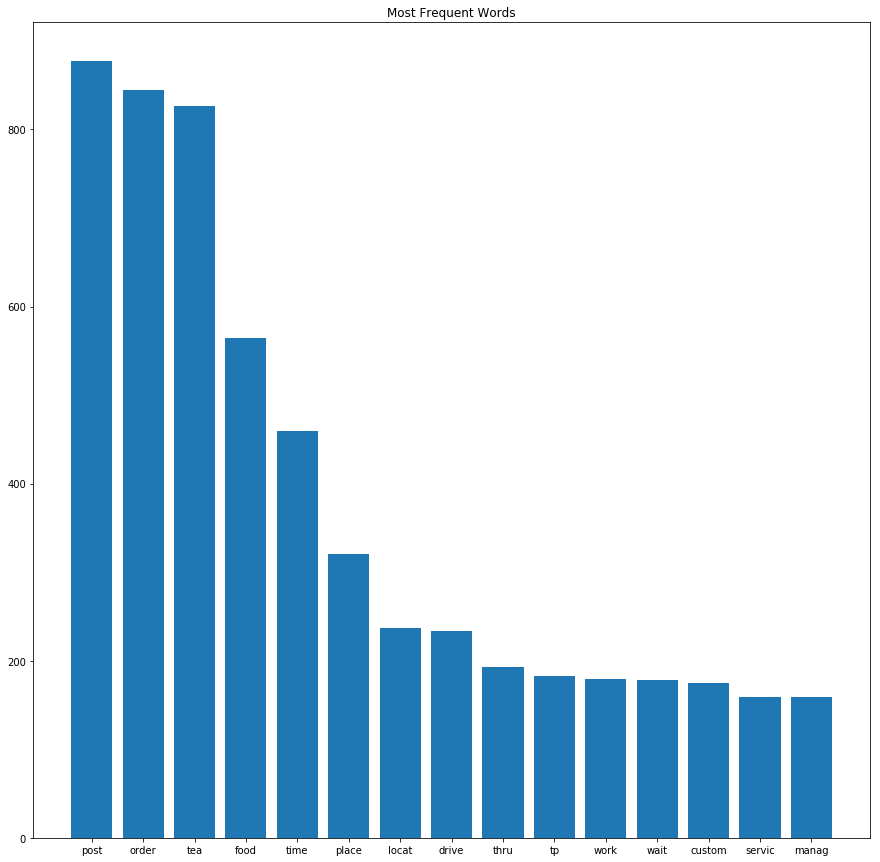

In [35]:
#plotting the top most extracted nouns
data = top_fifteen_dict
x = list(data.keys())
y = list(data.values())

fig = plt.figure(figsize = (15, 15))
plt.bar(x,y)
plt.title("Most Frequent Words") 
plt.show() 

In [36]:
for index, row in df.iterrows():
    df.at[index , 'TopNouns'] = " ".join(row['TopNouns'])

for index, row in test.iterrows():
    test.at[index , 'TopNouns'] = " ".join(row['TopNouns']) 

In [37]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,5))
X_train=cv.fit_transform(df['TopNouns'])

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,5))
X_test=cv.fit_transform(test['TopNouns'])

In [38]:
df['final'] = df['Sentiment_Target'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
test['final'] = test['Target_Class'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
y_train = df['final']
y_test = test['final']

In [41]:
#prediction using multinomial naive bais classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
classi = MultinomialNB()
classi.fit(X_train,y_train)
classi.score(X_test,y_test)
y_pred = classi.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.62      0.16      0.25       258
           0       0.13      0.32      0.19        60
           1       0.24      0.51      0.32        96

   micro avg       0.26      0.26      0.26       414
   macro avg       0.33      0.33      0.25       414
weighted avg       0.46      0.26      0.26       414



In [48]:
#finding the accuracy
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy C=0.01: 0.6231884057971014
Accuracy C=0.05: 0.6159420289855072
Accuracy C=0.25: 0.5603864734299517
Accuracy C=0.5: 0.5458937198067633
Accuracy C=1: 0.5217391304347826
